<a href="https://colab.research.google.com/github/MohammadArhamKhan/Task-8-Clustering-with-K-Means/blob/main/task8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv('/content/Mall_Customers.csv')
data.head()
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
#standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
# Select only the numerical columns for scaling
numerical_data = data.select_dtypes(include=np.number)
scaled_data=scaler.fit_transform(numerical_data)
pd.DataFrame(scaled_data).describe()

,0,1,2,3
count,200.000000,2.000000e+02,2.000000e+02,2.000000e+02
mean,0.000000,-1.021405e-16,-2.131628e-16,-1.465494e-16
std,1.002509,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.723412,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-0.861706,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,0.000000,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,0.861706,7.284319e-01,6.656748e-01,8.851316e-01
max,1.723412,2.235532e+00,2.917671e+00,1.894492e+00


In [ ]:
kmeans=KMeans(n_clusters=2,init='k-means++')
kmeans.fit(scaled_data)
kmeans.inertia_

515.6688891233368

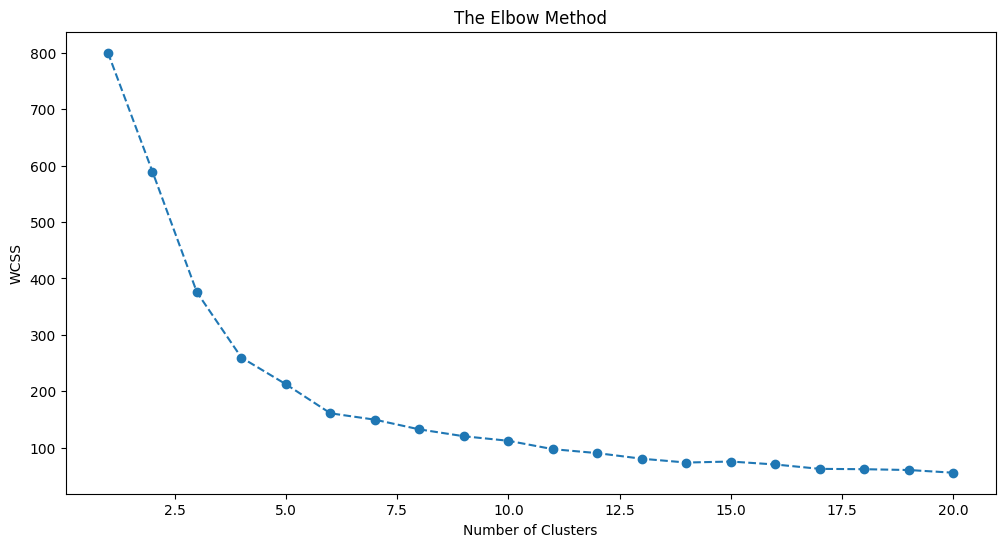

In [ ]:
wcss=[]

for cluster in range(1,21):
  kmeans=KMeans(n_clusters=cluster,init='k-means++')
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)

plt.figure(figsize=(12,6))
plt.plot(range(1,21),wcss,marker='o',linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')
plt.show()

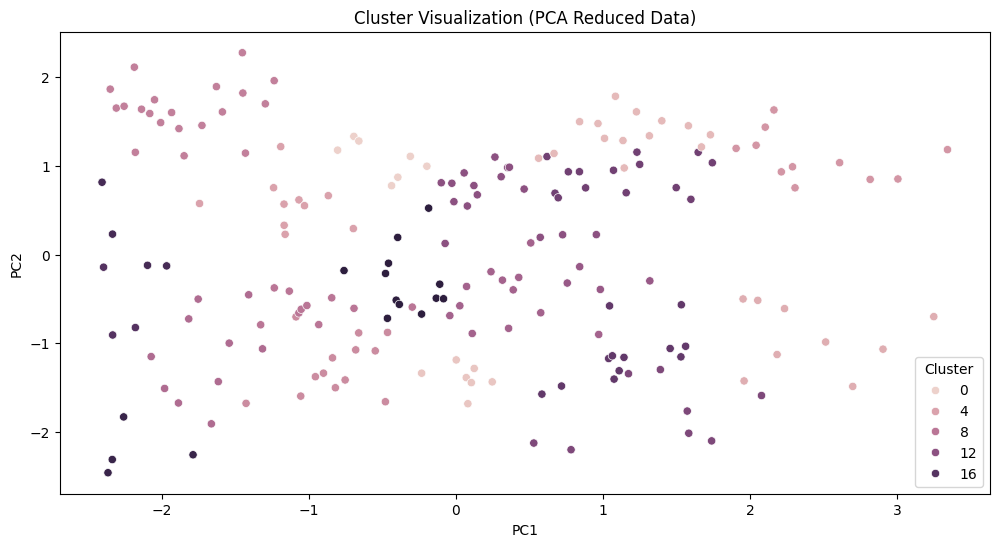

In [ ]:
#visualize cluster (using PCA-reduced 2D data)
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_data=pca.fit_transform(scaled_data)
pca_data=pd.DataFrame(pca_data,columns=['PC1','PC2'])
pca_data['Cluster']=kmeans.labels_
plt.figure(figsize=(12,6))
sns.scatterplot(x='PC1',y='PC2',hue='Cluster',data=pca_data)
plt.title('Cluster Visualization (PCA Reduced Data)')
plt.show()

In [ ]:
#Evaluate clustering using Silhouette Score
from sklearn.metrics import silhouette_score
silhouette_avg=silhouette_score(scaled_data,kmeans.labels_)
print(f'Silhouette Score for k=3:{silhouette_avg:.3f}')



Silhouette Score for k=3:0.323
